# III. Data Analysis
## Assignment 2
### Data Analysis on Climate Change on Crop
### Step 1: Set up the Environment
- Start by importing all the necessary libraries like `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Step 2: Loading the Data
- Load your CSV file into a Pandas DataFrame for further analysis.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('climate_change_agriculture_dataset.csv')

# Display the first few rows of the dataset
df.head()

# Get a summary of the dataset to understand its structure
df.info()

# Get basic statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Temperature             1000 non-null   int64 
 1   Precipitation           1000 non-null   int64 
 2   CO2 Levels              1000 non-null   int64 
 3   Crop Yield              1000 non-null   int64 
 4   Soil Health             1000 non-null   int64 
 5   Extreme Weather Events  1000 non-null   object
 6   Crop Disease Incidence  1000 non-null   object
 7   Water Availability      1000 non-null   object
 8   Food Security           1000 non-null   object
 9   Economic Impact         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,25.129000,47.90500,401.983000,545.497000,5.51700
std,14.920489,29.81904,57.153664,260.779723,2.84672
min,0.000000,0.00000,300.000000,100.000000,1.00000
25%,12.000000,21.00000,355.000000,320.000000,3.00000
50%,25.000000,48.00000,404.000000,546.000000,6.00000
75%,39.000000,72.00000,452.000000,768.250000,8.00000
max,50.000000,100.00000,500.000000,1000.000000,10.00000


### Step 3: Data Visualization to Uncover Patterns
#### 3.1: Distribution of Numerical Variables
- We have several numerical features like Temperature, Precipitation, CO2 Levels, and Crop Yield. Visualizing their distributions can help us understand how these variables are spread.

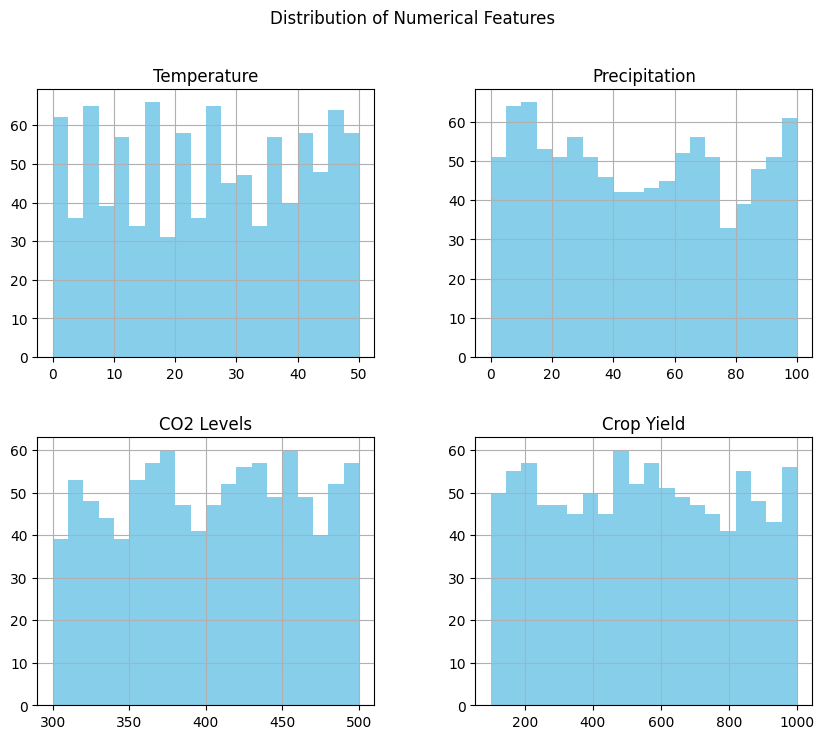

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df[['Temperature', 'Precipitation', 'CO2 Levels', 'Crop Yield']].hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()


#### 3.2: Correlation Analysis
- Correlation analysis helps identify relationships between numerical variables. We plot a correlation heatmap to easily visualize these relationships.

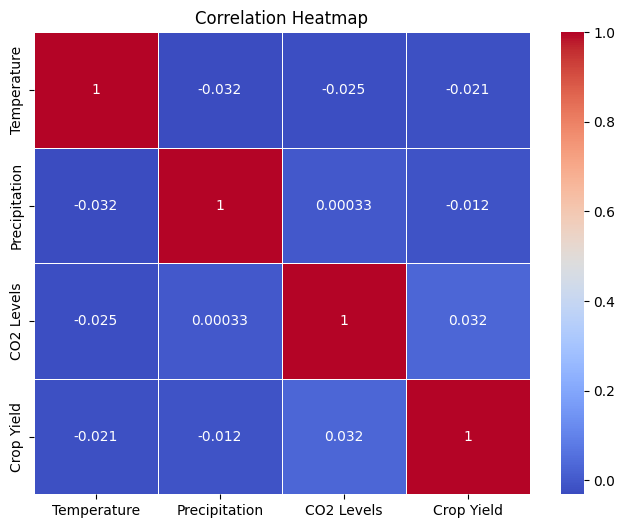

In [4]:
import seaborn as sns

# Calculate correlation matrix for numerical columns
corr_matrix = df[['Temperature', 'Precipitation', 'CO2 Levels', 'Crop Yield']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


- High correlations (close to 1 or -1) between features may indicate that one variable can predict another. For example, high CO2 Levels might correlate with Crop Yield.

### Step 4: Analyze Categorical Variables
#### 4.1: Bar Charts for Categorical Variables
Bar charts can help show how frequently different categories appear in the dataset.

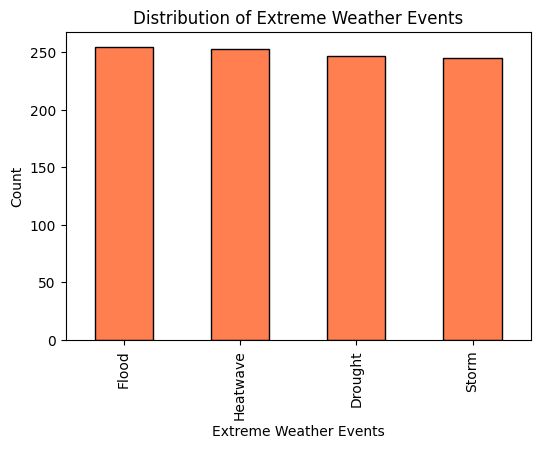

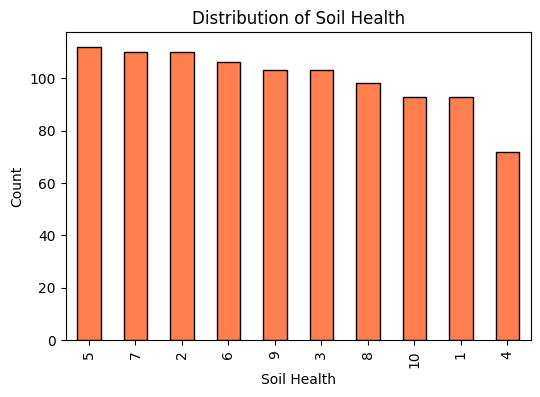

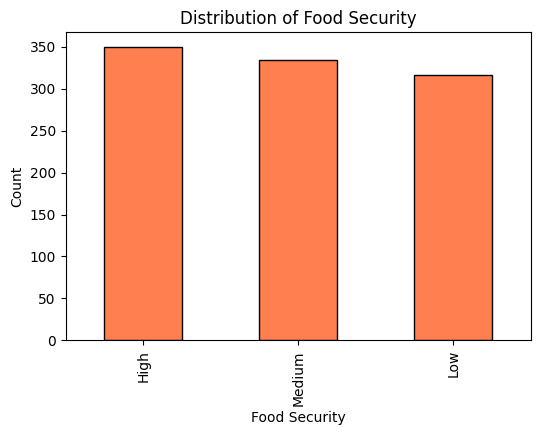

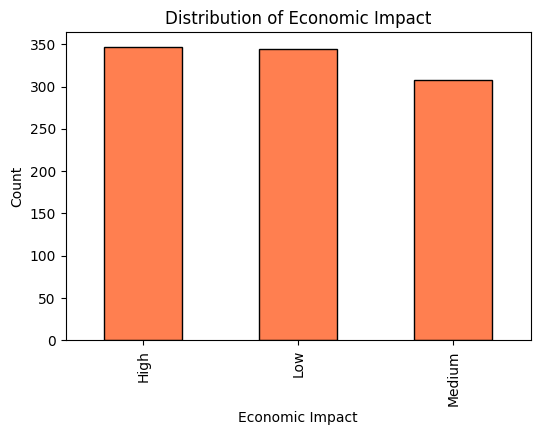

In [5]:
# Plot bar charts for categorical variables
categorical_columns = ['Extreme Weather Events', 'Soil Health', 'Food Security', 'Economic Impact']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Step 5: Analyze Relationships Between Categorical and Numerical Data
#### 5.1: Box Plots
Box plots can show how a categorical variable (e.g., Extreme Weather Events) affects a numerical variable (e.g., Crop Yield).

/var/folders/gv/rtnszm0j6zv_rcttl_93t75r0000gn/T/ipykernel_6761/65606826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extreme Weather Events', y='Crop Yield', data=df, palette='Set2')


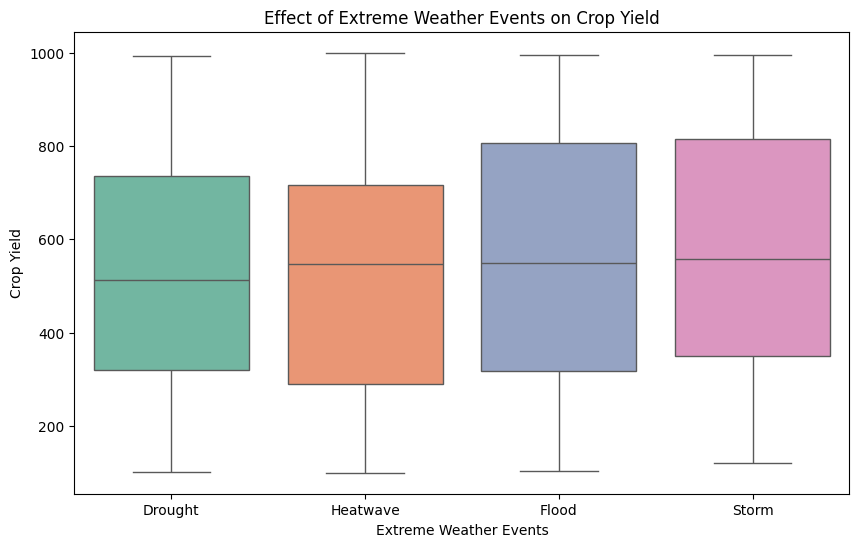

In [6]:
# Box plot to visualize the effect of Extreme Weather Events on Crop Yield
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extreme Weather Events', y='Crop Yield', data=df, palette='Set2')
plt.title('Effect of Extreme Weather Events on Crop Yield')
plt.show()


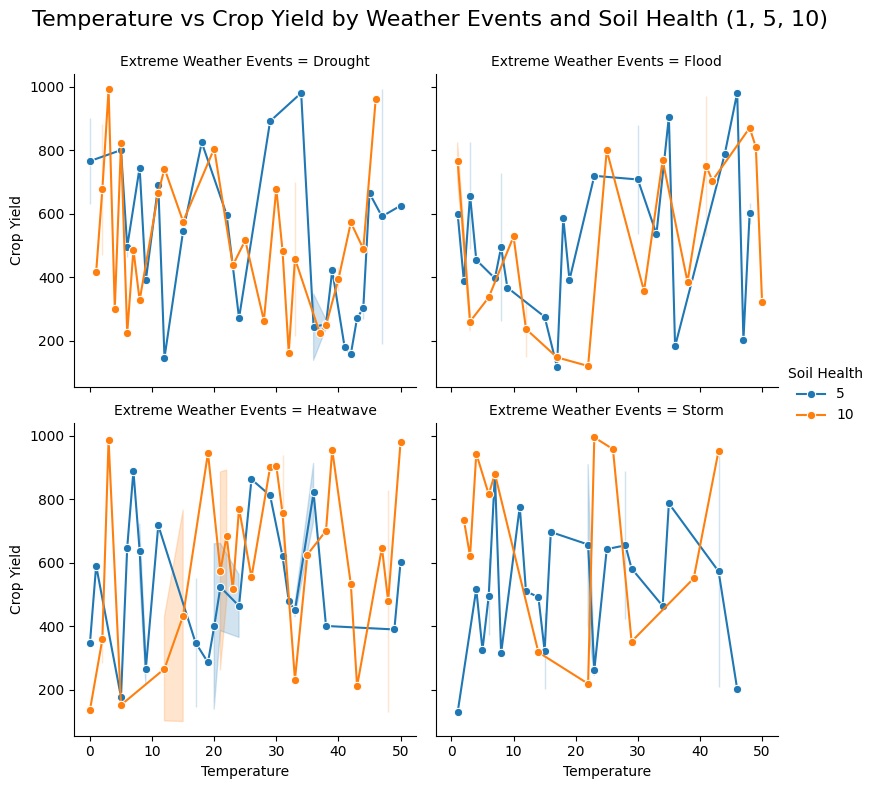

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to only include Soil Health levels 1, 5, and 10
df_filtered = df[df['Soil Health'].isin([5, 10])]

# Create a FacetGrid for Extreme Weather Events to separate them into subplots, focusing on specific Soil Health levels
g = sns.FacetGrid(df_filtered, col="Extreme Weather Events", hue="Soil Health", col_wrap=2, height=4)
g.map(sns.lineplot, "Temperature", "Crop Yield", marker="o").add_legend()

# Adjust the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Temperature vs Crop Yield by Weather Events and Soil Health (1, 5, 10)", fontsize=16)
plt.show()


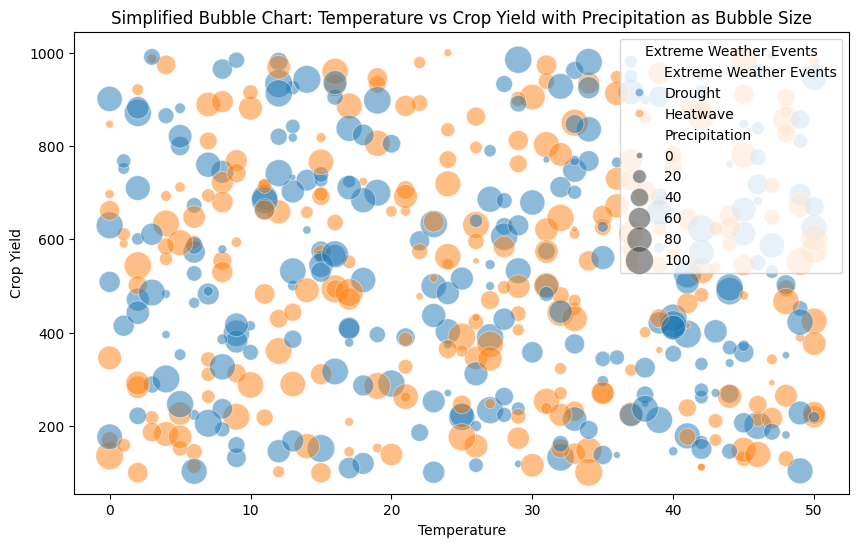

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset to reduce clutter (e.g., include only 'Drought' and 'Heatwave' events)
df_filtered = df[df['Extreme Weather Events'].isin(['Drought', 'Heatwave'])]

# Create a bubble chart with reduced bubble size and increased transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Temperature', y='Crop Yield', size='Precipitation', hue='Extreme Weather Events', 
                sizes=(20, 400), alpha=0.5)  # Reduce size range and increase transparency

# Customize the chart
plt.title('Simplified Bubble Chart: Temperature vs Crop Yield with Precipitation as Bubble Size')
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')

# Show legend and plot
plt.legend(title='Extreme Weather Events', loc='upper right')
plt.show()


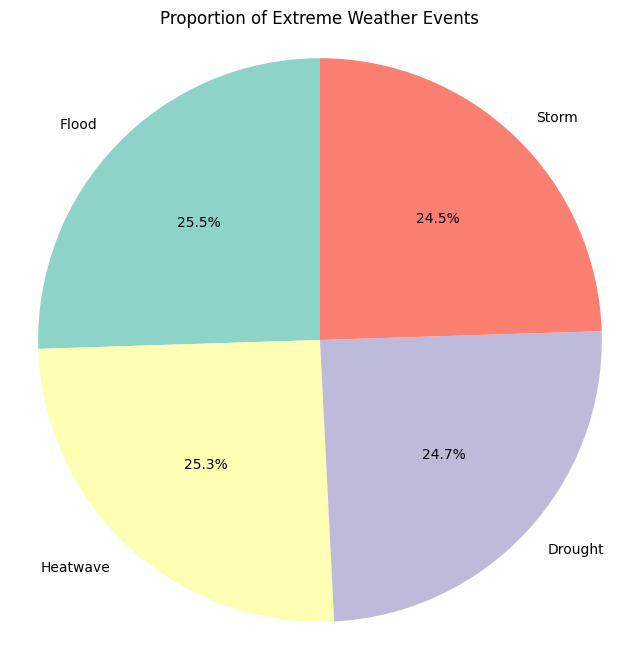

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each Extreme Weather Event
weather_event_counts = df['Extreme Weather Events'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_event_counts, labels=weather_event_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

# Customize the plot
plt.title('Proportion of Extreme Weather Events')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()
